In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_ride = pd.read_csv('ride_data.csv')
df_city = pd.read_csv('city_data.csv')

In [3]:
df_city.head(1)

,city,driver_count,type
0,Richardfort,38,Urban


In [4]:
df_ride.head(1)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873


In [24]:
ok=df_ride.groupby(['city'])['fare'].agg(['mean','count','sum']).reset_index()
joined= pd.merge(df_city,ok, how="left", on="city" )
joined = joined.rename(columns={'mean': 'mean_fares', 'count': 'rides_percity', 'sum': 'sum_fare'})
joined.head(2)


,city,driver_count,type,mean_fares,rides_percity,sum_fare
0,Richardfort,38,Urban,22.373214,28,626.45
1,Williamsstad,59,Urban,24.362174,23,560.33


In [15]:
joined_Urban = joined['type'] == "Urban"
joined_Urban = joined[(joined_Urban)]
joined_Suburban = joined['type'] == "Suburban"
joined_Suburban = joined[(joined_Suburban)]
joined_Rural = joined['type'] == "Rural"
joined_Rural = joined[(joined_Rural)]

In [16]:
driver_count1 = joined_Urban['driver_count']
driver_count2 = joined_Suburban['driver_count']
driver_count3 = joined_Rural['driver_count']

Text(0,0.5,'Average Fare ($)')

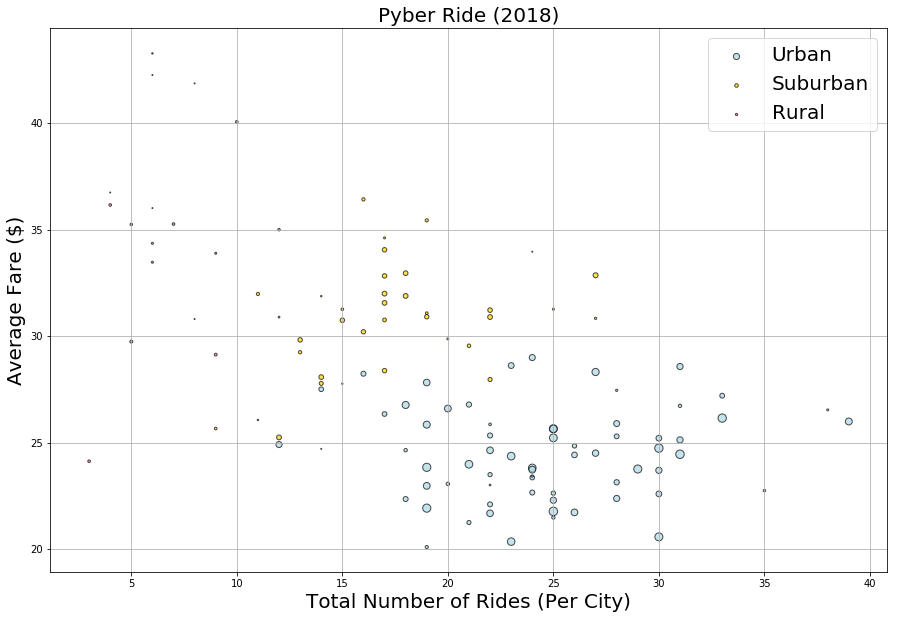

In [10]:
# Creating separate scatter plots for each city type, and combining them
ax1 = joined_Urban.plot(kind='scatter', x='rides_percity', y='mean_fares', s=driver_count1, color='lightblue', edgecolor='black', alpha=0.7, label='Urban', figsize=(15,10)
                       )    
ax2 = joined_Suburban.plot(kind='scatter', x='rides_percity', y='mean_fares', s=driver_count2, color='gold', edgecolor='black', alpha=0.7, ax=ax1, label='Suburban')    
ax3 = joined_Rural.plot(kind='scatter', x='rides_percity', y='mean_fares', s=driver_count3, color='lightcoral', edgecolor='black', alpha=0.7, ax=ax1, label='Rural')

# Plot formatting
plt.legend(fontsize=20)
plt.grid()
plt.title('Pyber Ride (2018)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize=20)
plt.ylabel('Average Fare ($)', fontsize=20)

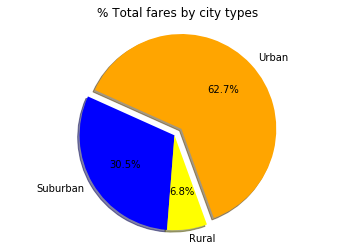

In [18]:
# % of Total Fares by City Type
total_fares = [joined_Urban["sum_fare"].sum(), joined_Suburban["sum_fare"].sum(), joined_Rural["sum_fare"].sum()]
explode = [0.1, 0, 0]
plt.pie(total_fares, labels=["Urban", "Suburban", "Rural"], 
        colors=["orange", "blue", "yellow"], autopct="%1.1f%%", shadow=True, explode=explode, startangle=290)
plt.title("% Total fares by city types")
plt.axis("equal")
plt.show()

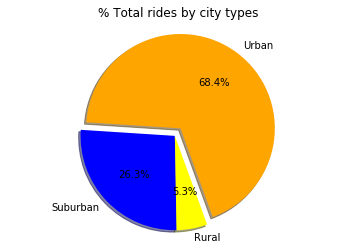

In [20]:
# of Total rides by City Type
total_rides = [joined_Urban["rides_percity"].sum(), joined_Suburban["rides_percity"].sum(), joined_Rural["rides_percity"].sum()]
explode = [0.1, 0, 0]
plt.pie(total_rides, labels=["Urban", "Suburban", "Rural"], 
        colors=["orange", "blue", "yellow"], autopct="%1.1f%%", shadow=True, explode=explode, startangle=290)
plt.title("% Total rides by city types")
plt.axis("equal")
plt.show()

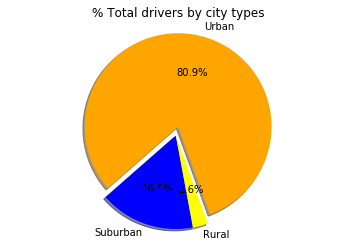

In [22]:

#Total drivers by city types
total_drivers = [joined_Urban["driver_count"].sum(), joined_Suburban["driver_count"].sum(), joined_Rural["driver_count"].sum()]
explode = [0.1, 0, 0]
plt.pie(total_drivers, labels=["Urban", "Suburban", "Rural"], 
        colors=["orange", "blue", "yellow"], autopct="%1.1f%%", shadow=True, explode=explode, startangle=290)
plt.title("% Total drivers by city types")
plt.axis("equal")
plt.show()